#**1- Descrizione del dataset**

Il dataset **Access to electricity (% of population)** proviene della Banca mondiale e monstra la percentuale della populazione che ha accesso all'elettricità per diversi paesi e anni.

#**2- Esplorazione iniziale**

In [1]:
#Import librerie e dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento dataset
df = pd.read_csv("access_electricity.csv")
df.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


In [2]:
# Per mosrtrare informazioni generali sul DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  242 non-null    object
 5   2013 [YR2013]  242 non-null    object
 6   2014 [YR2014]  242 non-null    object
 7   2015 [YR2015]  242 non-null    object
 8   2016 [YR2016]  242 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


In [3]:
# Per generare le statistiche descrittive per tutte le colonne numeriche
df.describe()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
count,242,242,242,242,242,242,242,242,242,228
unique,242,242,1,1,160,159,153,144,122,6
top,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Africa
freq,1,1,242,242,79,82,87,94,119,56


In [4]:
# Per restituire una tupla (righe e colonne)
df.shape

(242, 10)

***Commento:***
   
   Il dataset contiene 242 righe e 10 colonne.
   I tipi di dati sono prevalentemente numerici(percentuali) e stringhe (nome dei paesi).

#**3- selezioni dei dati motivate (commento per ciascuna), 2 delle quali usanto .loc[] e .iloc[]**

In [5]:
# Convertiamo gli anni in una colonna "Year" e i valori in "Access (%)"

df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Continent'],
    value_vars=['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]'],
    var_name='Year',
    value_name='Access (%)'
)

# Cambiamo il nome dell’anno
df_long['Year'] = df_long['Year'].str[:5].astype(int)

df_long.head()


,Country Name,Country Code,Series Name,Series Code,Continent,Year,Access (%)
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2012,69.1
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2012,98.7646604654583
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2012,..
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100


***Commento:***

La funzione melt() trasforma il dataset da formato `wide` a `long`, creando una colonna `Year` con gli anni e una `Access (%)` con i valori percentuali.
In questo modo possiamo analizzare più facilmente l’evoluzione temporale e usare selezioni dinamiche.

In [6]:
# Seleziona dei paesi europei più elettrificati in 2012

europe = df_long[df_long['Continent'] == 'Europe']
europe.head()


,Country Name,Country Code,Series Name,Series Code,Continent,Year,Access (%)
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100
12,Austria,AUT,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100
18,Belarus,BLR,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100
19,Belgium,BEL,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2012,100


In [7]:
#Seleziona dei paesi africani in anno 2015

africa_2015 = df_long.loc[(df_long['Continent'] == 'Africa') & (df_long['Year'] == 2015)]
africa_2015.head()

,Country Name,Country Code,Series Name,Series Code,Continent,Year,Access (%)
728,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2015,99.3367080688477
731,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2015,42
747,Benin,BEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2015,40.0334777832031
752,Botswana,BWA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2015,58.528751373291
757,Burkina Faso,BFA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2015,18.4700813293457


In [8]:
#Selezione di righe e colonne con iloc (prime 5 righe e 3 colonne)

sample = df_long.iloc[:5, 3:]
sample.head()


,Series Code,Continent,Year,Access (%)
0,EG.ELC.ACCS.ZS,Asia,2012,69.1
1,EG.ELC.ACCS.ZS,Europe,2012,100
2,EG.ELC.ACCS.ZS,Africa,2012,98.7646604654583
3,EG.ELC.ACCS.ZS,Oceania,2012,..
4,EG.ELC.ACCS.ZS,Europe,2012,100


In [9]:
#Selezione con loc di uno specifico paese

italy_data = df_long.loc[df_long['Country Name'] == 'Italy', ['Year', 'Access (%)']]
italy_data.head()

,Year,Access (%)
105,2012,100
347,2013,100
589,2014,100
831,2015,100
1073,2016,100


#**4- 2 riodinamenti (1 ascendente e 1 discendente)   di due variabili a scelta motivata (commento per ciascuno)**

In [10]:
#Ordinamento crescente per accesso all’elettricità
import pandas as pd

df_sorted_asc = df_long.sort_values(by='Access (%)', ascending=True)
df_sorted_asc.head(10)


,Country Name,Country Code,Series Name,Series Code,Continent,Year,Access (%)
729,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2015,..
971,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2016,..
996,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,North America,2016,..
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2012,..
270,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,North America,2013,..
512,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,North America,2014,..
245,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2013,..
754,British Virgin Islands,VGB,Access to electricity (% of population),EG.ELC.ACCS.ZS,North America,2015,..
1135,OECD members,OED,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,2016,..
487,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2014,..


***Commento:***

Ordinare i dati in modo ascendente per `Access (%)` permette di identificare i paesi con la minore percentuale di accesso all’elettricità.

In [11]:
#Ordinamento decrescente per anno
import pandas as pd


df_sorted_desc = df_long.sort_values(by='Year', ascending=False)
df_sorted_desc.head(10)


,Country Name,Country Code,Series Name,Series Code,Continent,Year,Access (%)
1189,Turkey,TUR,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2016,100
1209,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2016,38.1451377868652
1208,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2016,27.2193374633789
1207,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2016,71.6423492431641
1206,World,WLD,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,2016,87.3784431778704
1205,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2016,100
968,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,Asia,2016,84.1371383666992
969,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,Europe,2016,100
970,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,Africa,2016,99.439567565918
971,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,Oceania,2016,..


***Commento:***

Ordinare i dati in modo discendente per `Year` consente di visualizzare prima gli anni più recenti.

#**5- 1 nuova colonna creata usando apply e lambda (commento).**

In [12]:
# Convertire la colonna 'Access (%)' in numerico, cosi i valori non convertibili diventano NaN

df_long['Access (%)'] = pd.to_numeric(df_long['Access (%)'], errors='coerce')
df_long['Access (%)'].dtype


dtype('float64')

In [13]:
# Creazione della colonna usando apply e lambda

df_long['Access Level'] = df_long['Access (%)'].apply(
    lambda x: 'Low' if x < 50 else ('Medium' if x <= 90 else 'High') if pd.notnull(x) else 'Unknown')

#pd.notnull(x) per gestire eventuali valori NaN. Così i valori mancanti saranno classificati come "Unknown".

df_long[['Country Name', 'Year', 'Access (%)', 'Access Level']].head(10)


,Country Name,Year,Access (%),Access Level
0,Afghanistan,2012,69.100000,Medium
1,Albania,2012,100.000000,High
2,Algeria,2012,98.764660,High
3,American Samoa,2012,NaN,Unknown
4,Andorra,2012,100.000000,High
5,Angola,2012,35.821964,Low
6,Antigua and Barbuda,2012,95.254692,High
7,Arab World,2012,87.288244,Medium
8,Argentina,2012,99.584412,High
9,Armenia,2012,99.878876,High


***Commento:***

Dopo la conversione della colonna Access (%) in numerico, possiamo usare apply() con lambda per creare la nuova colonna Access Level.
Questo approccio permette di classificare i paesi in base al loro livello di accesso all’elettricità, facilitando sia l’analisi che la visualizzazione dei dati.

#**6- 5 grafici comprensivi di titolo, labels e interpretazione (commento per ciascuno) di cui almeno 1 boxplot, 1 istogramma e 1 scatterplot usando sia Matplotlib che Seaborn**

##***1- Boxplot: Accesso all’elettricità per continente con Seaborn***

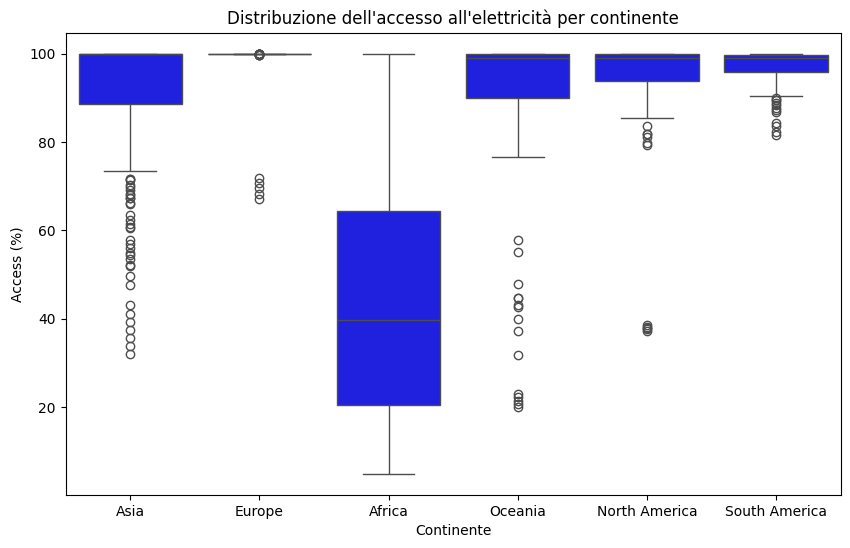

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_long, x='Continent', y='Access (%)', color='blue')
plt.title('Distribuzione dell\'accesso all\'elettricità per continente')
plt.xlabel('Continente')
plt.ylabel('Access (%)')
plt.show()


***Commento:***

Il boxplot mostra la distribuzione dell’accesso all’elettricità nei vari continenti.
Europa e Nord America hanno valori medi elevati, mentre Africa presenta le medie più basse.

##***2- Istogramma: Distribuzione generale dell’accesso con Matplotlib***

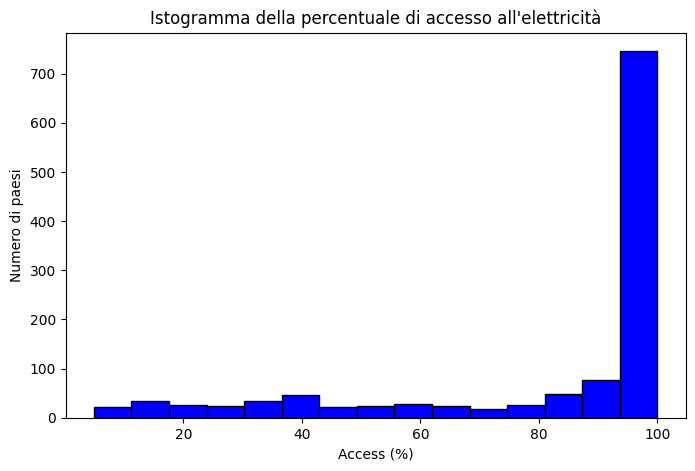

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_long['Access (%)'].dropna(), bins=15, color='blue', edgecolor='black')
plt.title('Istogramma della percentuale di accesso all\'elettricità')
plt.xlabel('Access (%)')
plt.ylabel('Numero di paesi')
plt.show()


***Commento:***

L’istogramma mostra la frequenza dei diversi livelli di accesso all’elettricità.
La maggior parte dei paesi ha valori alti (>80%), ma esistono ancora paesi con accesso molto basso.

##***3- Scatterplot: Accesso nel tempo per un paese con Seaborn***


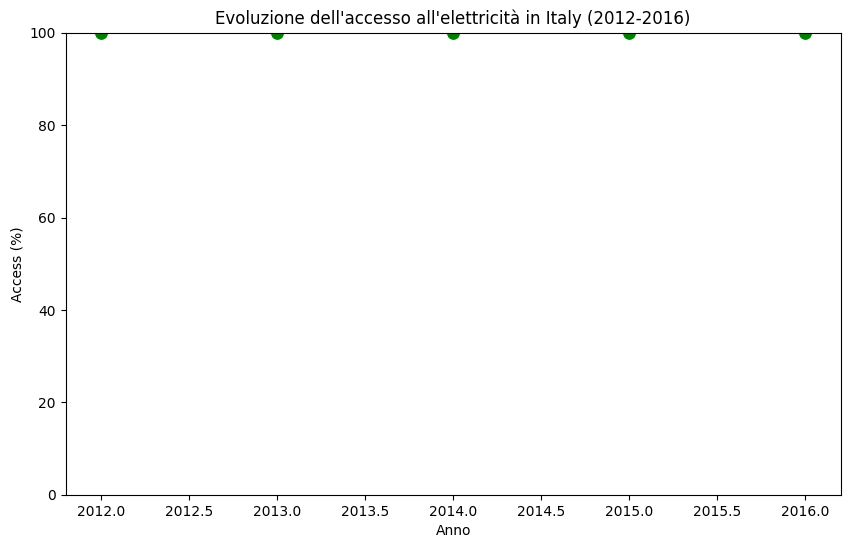

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_long[df_long['Country Name']=='Italy'], x='Year', y='Access (%)', s=100, color='green')
plt.title('Evoluzione dell\'accesso all\'elettricità in Italy (2012-2016)')
plt.xlabel('Anno')
plt.ylabel('Access (%)')
plt.ylim(0, 100)
plt.show()



***Commento:***

Lo scatterplot mostra l’evoluzione temporale dell’accesso all’elettricità in Italia.
Si nota un trend stabile vicino al 100%, coerente con i paesi ad alto sviluppo.

##***4- Barplot: Media Access per livello con Seaborn***

/tmp/ipython-input-1423881830.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




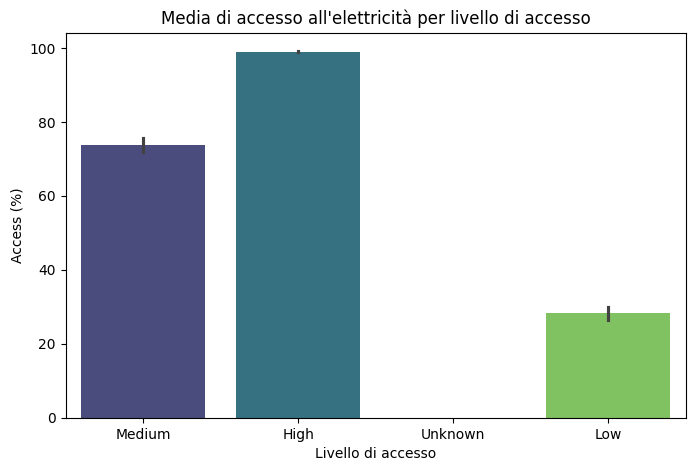

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x='Access Level', y='Access (%)', palette='viridis')
plt.title("Media di accesso all'elettricità per livello di accesso")
plt.xlabel("Livello di accesso")
plt.ylabel("Access (%)")
plt.show()


***Commento:***

Il barplot mostra la media di accesso all’elettricità per ciascun livello.

##***5- Lineplot: Media Access nel tempo per continente con Seaborn***

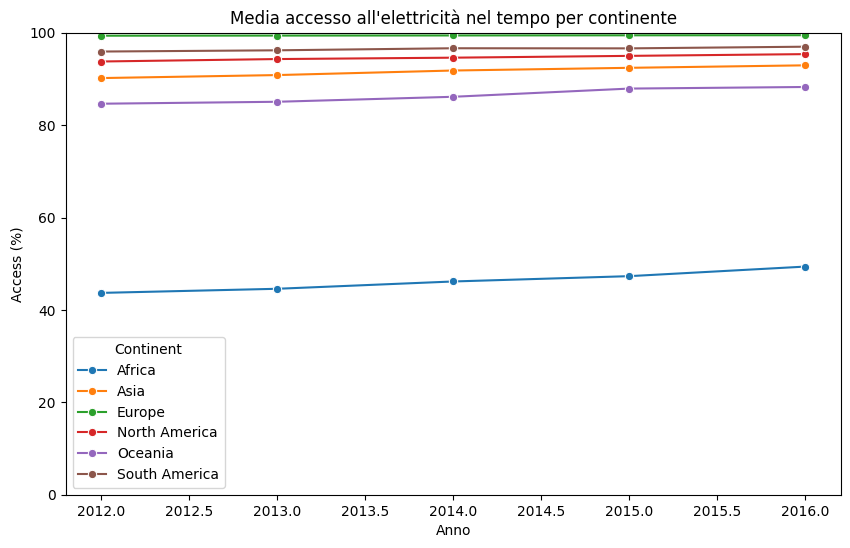

In [ ]:
plt.figure(figsize=(10,6))
df_mean = df_long.groupby(['Year','Continent'])['Access (%)'].mean().reset_index()
sns.lineplot(data=df_mean, x='Year', y='Access (%)', hue='Continent', marker='o')
plt.title('Media accesso all\'elettricità nel tempo per continente')
plt.xlabel('Anno')
plt.ylabel('Access (%)')
plt.ylim(0, 100)
plt.show()


***Commento:***

Il lineplot evidenzia l’andamento medio dell’accesso all’elettricità nei diversi continenti nel tempo.
Si notano miglioramenti in Africa e Asia, mentre Europa e Nord America rimangono quasi stabili al 100%.

#**Commento conclusivo**

L’analisi evidenzia come, nel corso degli anni, l’accesso all’elettricità sia migliorato a livello globale, pur restando fortemente diseguale tra regioni.
L’Africa e alcune parti dell’Asia meridionale mostrano ancora valori bassi.
In futuro, sarebbe interessante:

1- Integrare il dataset con indicatori economici;

2- Usare modelli di regressione per prevedere l’accesso nei prossimi 10 anni;

3- Realizzare una dashboard interattiva (es. Plotly o Streamlit).